# MURAM

### The first function aims at plotting the temperature stratification across the atmosphere sampled by the temperature 3D cube. The grid size of the cube is 600x300x600 sampling 12x3x12 Mm, meaning that the resolution in the z direction is 10 km.

In [1]:
import pyfits
import matplotlib.pyplot as plt
import pylab
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

In [6]:
## Path to data cubes
p = '/home/fatima/gwdg/'

### This function allows for computing the averaged temperature profile with height

In [11]:
def T_strat(image):
  ind = image[5:12]
  plt.figure(figsize=(12,8))
  plt.style.use('ggplot')
  T = pyfits.getdata(p+image)
  H = np.arange(300)   ## the number of grids in the z direction
  T = [T[:,i,:].mean() for i in H]  # the mean of temperature at each height
  plt.plot(10*H,T)
  plt.xlabel('Height (km)',fontsize=18)
  plt.ylabel('Mean temperature',fontsize=18)
  #plt.savefig(wd+'T_strat_'+ind+'.png')
  plt.show()
  #plt.clf()


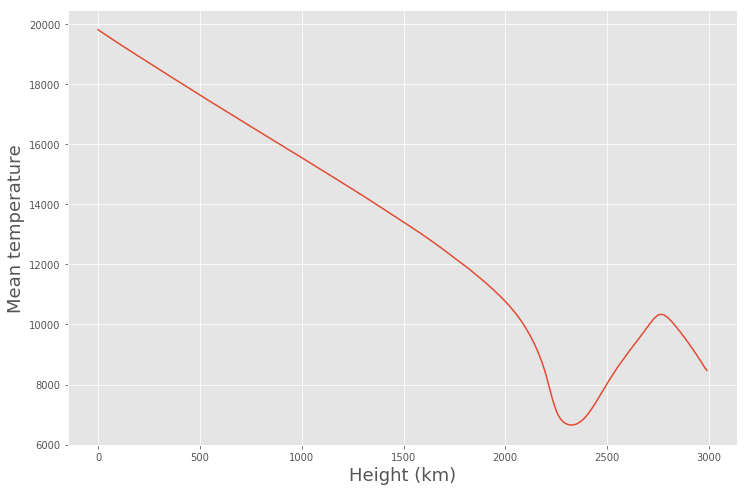

In [12]:
T_strat('eosT.100000.fits')

### This function will show the slice of LOS velocity and temperature at a certain height. The latter is to be given in km.

In [13]:
def show(image_T,image_V,height):
 data_T = pyfits.getdata(p+image_T)
 data_V = pyfits.getdata(p+image_V)
 h  = height/10
 data_T = data_T[:,h,:]
 data_V = data_V[:,h,:]
 plt.style.use('classic')
 plt.figure(figsize=(12,5))
 plt.subplot(1,2,1)
 im1=plt.imshow(data_T)
 plt.colorbar(im1,fraction=0.046,pad=0.04)

 plt.subplot(1,2,2)
 im2=plt.imshow(data_V)
 plt.colorbar(im2,fraction=0.046,pad=0.04)
 plt.subplots_adjust(wspace=.35)#,bottom=0, left=.01, right=.99, top=.90 )


 #plt.savefig(wd+image_T+' '+str(height)+'.png')
 plt.show()



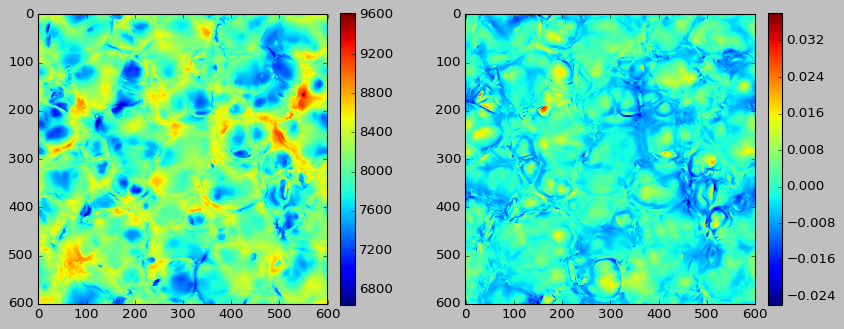

In [14]:
show('eosT.100000.fits', 'result_2.100000.fits',2500)

### This function is to plot Stokes profiles at a given pixel after synthesizing them using the code SPINOR, with the MURAM cubes used as initial stratification of physical parameters. For this, we need the output inverted profiles fits file.

In [18]:
p = '/home/fatima/kahil_data/project_4/grey_simulation_400/'
csfont = {'fontname':'Comic Sans MS'}

lam_0 = 5250.208 # central wavelength
## plot Stokes profiles at a certain pixel
def Plot_Stokes(stokes):
 i = int(raw_input('Enter x:'))
 j = int(raw_input('Enter y:'))
 data  = pyfits.getdata(p+stokes)
 wav = (np.linspace(5249.808,5250.808,101) - lam_0)*1000
 del_lam2= np.array([wav[28],wav[32],wav[36],wav[40],wav[44],wav[48],wav[52], wav[63]])
 x=np.array([28,32,36,40,44,48,52,63])
 fig = plt.figure(figsize=(20,12),facecolor='white')
 ax1 = fig.add_subplot(2,2,1)
 ax1.plot(del_lam2,data[i,j,0,:][x], 'kx',ms=10,mew=2,label='IMaX')
 ax1.plot(wav,data[i,j,0,:],label='Synth')
 #ax1.plot(del_lam2,Ip,'rx',ms=10,mew=2)
 #ax1.plot(del_lam2, Im, 'bx',ms=10,mew=2)
 
 #ax1.plot(wav,Prof_Ip,'r')
 #ax1.plot(wav,Prof_Im,'b')
 ax1.set_xlabel('$\Delta\lambda$',fontsize=18)
 ax1.set_ylabel('Stokes I',fontsize=18)
 ax1.set_xticks(np.arange(-400,600,100))
 ax1.set_xticks(np.arange(-400,600,50),minor=True)
 ax1.tick_params(axis = 'both', which = 'major',length=6, width=2,labelsize = 12)
 ax1.tick_params(axis = 'both', which = 'minor', length=3, width=1)
 #ax1.set_title('$B_{LOS}$ = '+str("%.1f" %B_LOS[i][j])+' G',fontsize=20)
 #ax1.legend(loc='lower right')
 ax1.grid()
 ax1.legend(loc='lower left')

 ax2 = fig.add_subplot(2,2,2)
 ax2.plot(del_lam2,data[i,j,1,:][x],'kx',ms=10,mew=2,label='IMaX')
 ax2.plot(wav,data[i,j,1,:], label='Synth')
 ax2.set_xlim(-400,600)
 ax2.set_xlabel('$\Delta\lambda$',fontsize=20)
 ax2.set_ylabel('Stokes V',fontsize=20,**csfont)
 ax2.set_xticks(np.arange(-400,600,100))
 ax2.set_xticks(np.arange(-400,600,50),minor=True)
 ax2.tick_params(axis = 'both', which = 'major',length=6, width=2,labelsize = 12)
 ax2.tick_params(axis = 'both', which = 'minor', length=3, width=1)
 #ax2.set_title('$B_{LOS}$ = '+str("%.1f" %B_LOS[i][j])+' G',fontsize=20)
 #ax2.legend(loc='lower right')
 ax2.grid()
 ax2.legend(loc='lower left')

 ax3 = fig.add_subplot(2,2,3)
 ax3.plot(del_lam2,data[i,j,2,:][x],'kx',ms=10,mew=2,label='IMaX')
 ax3.plot(wav, data[i,j,2,:], label='Synth')
 ax3.set_xlim(-400,600)
 ax3.set_xlabel('$\Delta\lambda$',fontsize=20)
 ax3.set_ylabel('Stokes Q',fontsize=20,**csfont)
 ax3.set_xticks(np.arange(-400,600,100))
 ax3.set_xticks(np.arange(-400,600,50),minor=True)
 ax3.tick_params(axis = 'both', which = 'major',length=6, width=2,labelsize = 12)
 ax3.tick_params(axis = 'both', which = 'minor', length=3, width=1)
 #ax3.set_title('$B_{LOS}$ = '+str("%.1f" %B_LOS[i][j])+' G',fontsize=20)
 #ax2.legend(loc='lower right')
 ax3.grid()
 ax3.legend(loc='lower left')

 ax4 = fig.add_subplot(2,2,4)
 ax4.plot(del_lam2,data[i,j,3,:][x],'kx',ms=10,mew=2,label='IMaX')
 ax4.plot(wav, data[i,j,3,:], label='Synth')
 ax4.set_xlim(-400,600)
 ax4.set_xlabel('$\Delta\lambda$',fontsize=20)
 ax4.set_ylabel('Stokes U',fontsize=20,**csfont)
 ax4.set_xticks(np.arange(-400,600,100))
 ax4.set_xticks(np.arange(-400,600,50),minor=True)
 ax4.tick_params(axis = 'both', which = 'major',length=6, width=2,labelsize = 12)
 ax4.tick_params(axis = 'both', which = 'minor', length=3, width=1)
 #ax4.set_title('$B_{LOS}$ = '+str("%.1f" %B_LOS[i][j])+' G',fontsize=20)
 #ax2.legend(loc='lower right')
 ax4.grid()
 ax4.legend(loc='lower left')
 
 #plt.suptitle('$B_{LOS}$ = '+str("%.1f" %B_LOS[i][j])+' G',fontsize=24,**csfont)
 #plt.savefig(wd+'pixel'+str(j)+','+str(i))
 plt.show()

Enter x:100
Enter y:250


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


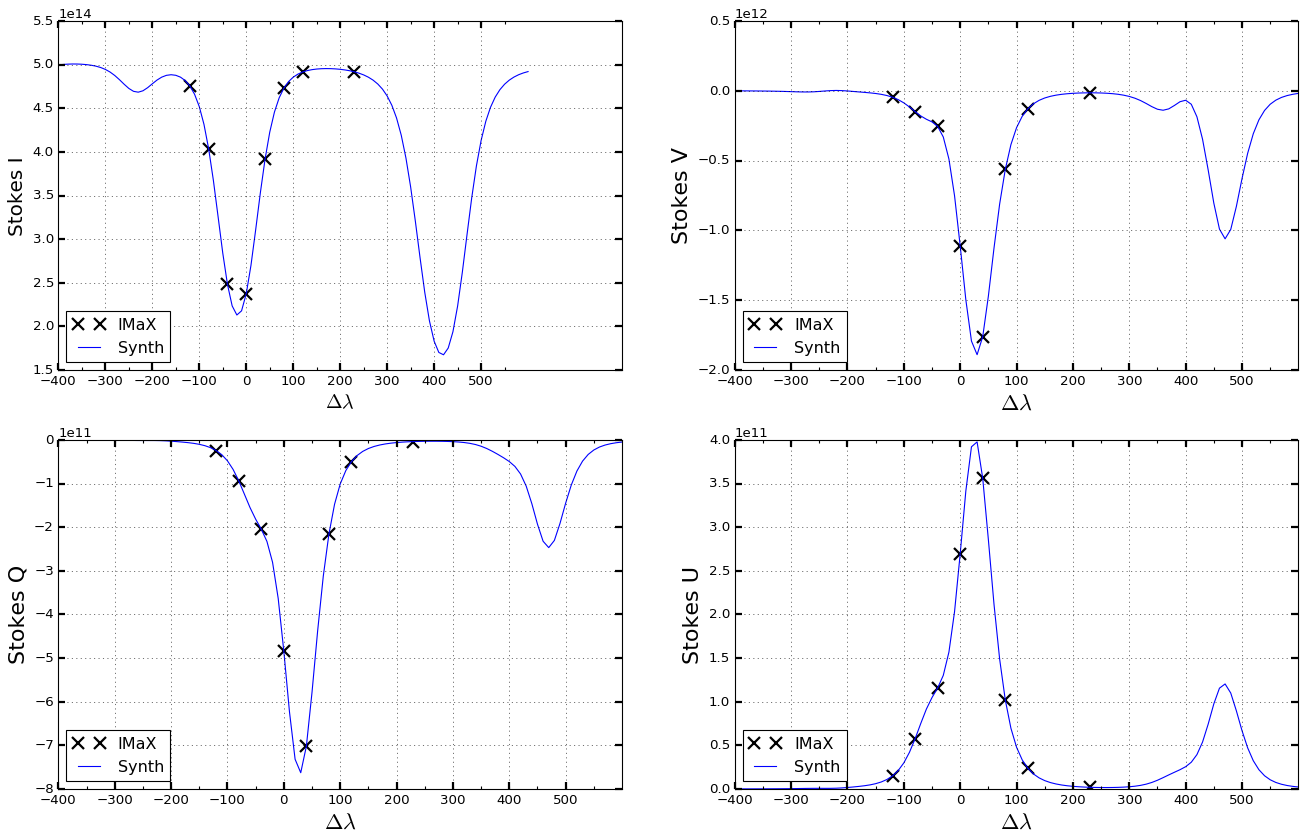

In [19]:
Plot_Stokes('inverted_profs.1.fits')